In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import os
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models.widgets import Dropdown
from bokeh.io import curdoc
from bokeh.layouts import column
import plotly.graph_objects as go

In [2]:
#download data for '54F.F' (= Audax Renowables) and define start and end:
tickers = ['54F.F']
start_date = '2020-01-01'
end_date = '2020-12-31'

# use pandas_datareader for the import:
df = wb.DataReader(tickers, 'yahoo', start_date, end_date)
df =df.reset_index()
df

Attributes,Date,Adj Close,Close,High,Low,Open,Volume
Symbols,,54F.F,54F.F,54F.F,54F.F,54F.F,54F.F
0,2020-01-02,2.260,2.260,2.260,2.110,2.110,0
1,2020-01-03,2.178,2.178,2.260,2.172,2.238,0
2,2020-01-06,2.170,2.170,2.170,2.120,2.170,0
3,2020-01-07,2.420,2.420,2.420,2.150,2.150,0
4,2020-01-08,2.320,2.320,2.446,2.320,2.446,0
...,...,...,...,...,...,...,...
249,2020-12-22,1.716,1.716,1.716,1.674,1.674,0
250,2020-12-23,1.712,1.712,1.742,1.712,1.726,0
251,2020-12-28,1.760,1.760,1.760,1.716,1.716,0


In [7]:
data_date = pd.Series(df['Date'])
df['Open']


Symbols,54F.F
0,2.110
1,2.238
2,2.170
3,2.150
4,2.446
...,...
249,1.674
250,1.726
251,1.716
252,1.762


In [4]:
data = pd.DataFrame(data_date)
data['Open']=df['Open']
data['Close']=df['Close']
data['High']=df.High
data['Low'] = df.Low

In [5]:
data

,Date,Open,Close,High,Low
0,2020-01-02,2.110,2.260,2.260,2.110
1,2020-01-03,2.238,2.178,2.260,2.172
2,2020-01-06,2.170,2.170,2.170,2.120
3,2020-01-07,2.150,2.420,2.420,2.150
4,2020-01-08,2.446,2.320,2.446,2.320
...,...,...,...,...,...
249,2020-12-22,1.674,1.716,1.716,1.674
250,2020-12-23,1.726,1.712,1.742,1.712
251,2020-12-28,1.716,1.760,1.760,1.716
252,2020-12-29,1.762,1.970,1.970,1.762


In [6]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()

fig.show()

In [ ]:
F_data_open = F_data['Open']
F_data_open

Symbols,54F.F
Date,
2020-01-02,2.110
2020-01-03,2.238
2020-01-06,2.170
2020-01-07,2.150
2020-01-08,2.446
...,...
2020-12-22,1.674
2020-12-23,1.726
2020-12-28,1.716


In [ ]:
F_data.keys()

MultiIndex([('Adj Close', '54F.F'),
            (    'Close', '54F.F'),
            (     'High', '54F.F'),
            (      'Low', '54F.F'),
            (     'Open', '54F.F'),
            (   'Volume', '54F.F')],
           names=['Attributes', 'Symbols'])

In [ ]:
def plot_stock_price(stock):
    p = figure(plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
               title="Stock price", toolbar_location='above')

    inc = stock['Close'] > stock['Open']
    dec = stock['Open'] > stock['Close']
    view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
    view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

    p.segment(x0='index', x1='index', y0='Low', y1='High', color=RED, source=stock, view=view_inc)
    p.segment(x0='index', x1='index', y0='Low', y1='High', color=GREEN, source=stock, view=view_dec)

    p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=BLUE, line_color=BLUE,
           source=stock,view=view_inc, name="price")
    p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
           source=stock,view=view_dec, name="price")

    p.legend.location = "top_left"
    p.legend.border_line_alpha = 0
    p.legend.background_fill_alpha = 0
    p.legend.click_policy = "mute"
    
    return p
# Define constants
W_PLOT = 1500
H_PLOT = 600
TOOLS = 'pan,wheel_zoom,reset'

VBAR_WIDTH = 0.2
RED = Category20[7][6]
GREEN = Category20[5][4]

BLUE = Category20[3][0]
BLUE_LIGHT = Category20[3][1]

ORANGE = Category20[3][2]
PURPLE = Category20[9][8]
BROWN = Category20[11][10]

stock = ColumnDataSource(
    data=dict(Date=[], Open=[], Close=[], High=[], Low=[],index=[]))

p_stock = plot_stock_price(F_data)


<AxesSubplot:xlabel='Date'>

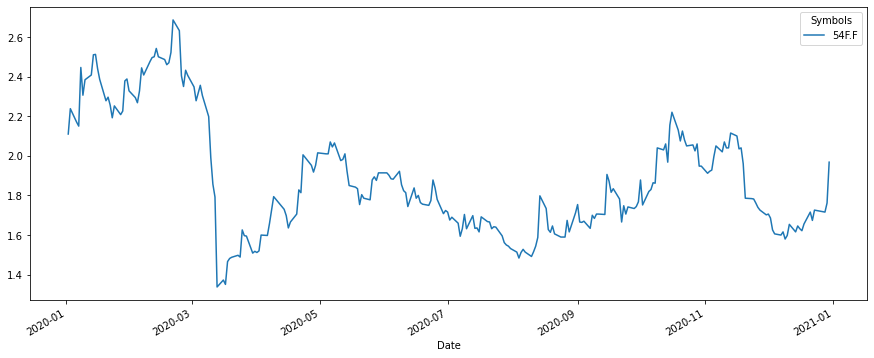

In [ ]:
F_data_open.plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

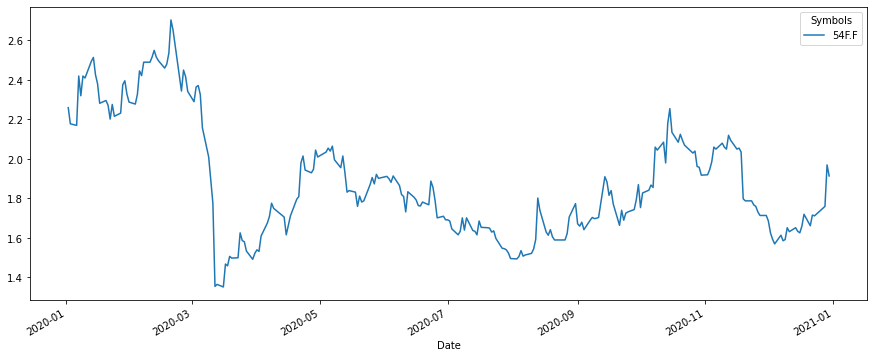

In [ ]:
F_data_close.plot(figsize=(15,6))

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

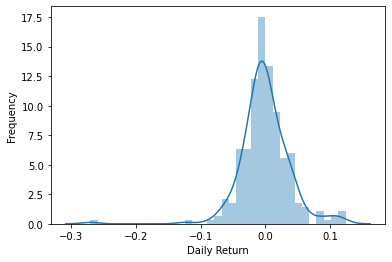

In [ ]:
log_return = np.log(1 + F_data_close.pct_change())
#Plot
sns.distplot(log_return.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [ ]:
#unbiased estimator of the daily return, we obtain the expected annual rate of return or the drift (μ - 0.5(var))t;1

mean = log_return.mean()
var = log_return.var()
drift = mean - (0.5*var)
drift

Symbols
54F.F   -0.00139
dtype: float64

In [ ]:
# We are intializing the Monte Carlo simulation setting sample size and trials. 
stdev = log_return.std()
days = 252
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

In [ ]:
F_data_close.iloc[-1]

Symbols
54F.F    1.914
Name: 2020-12-30 00:00:00, dtype: float64

In [ ]:
# Calculating the prices starting with the last closing price. Therefore applying the monte carlo simulations to predict the stock prices
# for the next trading year
price_paths = np.zeros_like(daily_returns)
price_paths[0] = F_data_close.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

In [ ]:
# open close 

In [ ]:
from bokeh.models import BooleanFilter, CDSView, Select, Range1d, HoverTool
from bokeh.palettes import Category20
from bokeh.models.formatters import NumeralTickFormatter

In [ ]:
def get_symbol_df(symbol=None):
    df = pd.DataFrame(pd.read_csv('./summary_stock_data/' + symbol + '.csv'))[-50:]
    df.reset_index(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"])
    return df


ValueError: failed to validate BooleanFilter(id='1057', ...).booleans: expected either None or a value of type Seq(Bool), got Symbols     54F.F
Date             
2020-01-02   True
2020-01-03  False
2020-01-06  False
2020-01-07   True
2020-01-08  False
...           ...
2020-12-22   True
2020-12-23  False
2020-12-28   True
2020-12-29   True
2020-12-30  False

[254 rows x 1 columns]

# Fra's code for ref

In [ ]:
# set sample size:
n = len(F_data_close)

# initialize ybar to an array of length r=10000 to later store results:
r = 10000
ybar = np.empty(r)

#calculate stats
mean = np.mean(F_data_close)
var= np.var(F_data_close)
print(mean)
# repeat r times:
for j in range(r):
    # draw a sample and store the sample mean in pos. j=0,1,... of ybar:
    sample = stats.norm.rvs(mean, var, size=n)
    ybar[j] = np.mean(sample)
    
# the first 20 of 10000 estimates:
print(f'ybar[0:19]: \n{ybar[0:19]}\n')

# simulated mean:
print(f'np.mean(ybar): {np.mean(ybar)}\n')

# simulated variance:
print(f'np.var(ybar, ddof=1): {np.var(ybar, ddof=1)}\n')

# simulated density:
kde = sm.nonparametric.KDEUnivariate(ybar)
kde.fit()

# normal density:
x_range = np.linspace(1, 2)
y = stats.norm.pdf(x_range, mean, np.sqrt(var))

# create graph:
plt.plot(kde.support, kde.density, label='ybar')
plt.plot(x_range, y, linestyle='--', label='normal distribution')
plt.ylabel('density')
plt.xlabel('ybar')
plt.legend()
plt.grid()
#plt.savefig('PyGraphs/Simulation-Repeated-Results.pdf')
plt.show()


## Automated Stock Predictions 

In [ ]:
def import_stock_data(tickers, start = '2010-1-1'):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)
#Example use
data = import_stock_data(["FB","GOOG","AAPL"], start = '2005-1-1')

In [ ]:
def log_returns(data):
    return (np.log(1+data.pct_change()))
#Example use
log_return = log_returns(data)

In [ ]:
def drift_calc(data):
    lr = log_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    try:
        return drift.values
    except:
        return drift
#Example use
drift_calc(data)

In [ ]:
def daily_returns(data, days, iterations):
    ft = drift_calc(data, return_type)
    try:
        stv = log_returns(data).std().values
    except:
        stv = log_returns(data).std()
    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    return dr
#Example use
daily_returns(data, 50, 1000)

In [ ]:
def beta_sharpe(data, mark_ticker = "^GSPC", start='2010-1-1', riskfree = 0.025):
    # Beta
    dd, mark_ret = market_data_combination(data, mark_ticker, start)
    log_ret = log_returns(dd)
    covar = log_ret.cov()*252  # Annualized
    covar = pd.DataFrame(covar.iloc[:-1,-1])
    mrk_var = log_ret.iloc[:,-1].var()*252 #Annualized
    beta = covar/mrk_var
    
    stdev_ret = pd.DataFrame(((log_ret.std()*250**0.5)[:-1]), columns=['STD'])
    beta = beta.merge(stdev_ret, left_index=True, right_index=True)
    
    # CAPM
    for i, row in beta.iterrows():
        beta.at[i,'CAPM'] = riskfree + (row[mark_ticker] * (mark_ret-riskfree))
    # Sharpe
    for i, row in beta.iterrows():
        beta.at[i,'Sharpe'] = ((row['CAPM']-riskfree)/(row['STD']))
    beta.rename(columns={"^GSPC":"Beta"}, inplace=True)
    
    return beta
#Example use
#Make sure the start date here is the same as the start day of the original data.
beta_sharpe(data, '2005-1-1') 

In [ ]:
def probs_find(predicted, higherthan, on = 'value'):
    if on == 'return':
        predicted0 = predicted.iloc[0,0]
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
        less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
    elif on == 'value':
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [i for i in predList if i >= higherthan]
        less = [i for i in predList if i < higherthan]
    else:
        print("'on' must be either value or return")
    return (len(over)/(len(over)+len(less)))
#Example use (probability our investment will return at least 20% over the days specified in our prediction
probs_find(predicted, 0.2, on = 'return')

In [ ]:
def simulate_mc(data, days, iterations, plot=True):
    # Generate daily returns
    returns = daily_returns(data, days, iterations)
    # Create empty matrix
    price_list = np.zeros_like(returns)
    # Put the last actual price in the first row of matrix. 
    price_list[0] = data.iloc[-1]
    # Calculate the price of each day
    for t in range(1,days):
        price_list[t] = price_list[t-1]*returns[t]
    
    # Plot Option
    if plot == True:
        x = pd.DataFrame(price_list).iloc[-1]
        fig, ax = plt.subplots(1,2, figsize=(14,4))
        sns.distplot(x, ax=ax[0])
        sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
        plt.xlabel("Stock Price")
        plt.show()
    
    #CAPM and Sharpe Ratio
    
    # Printing information about stock
    try:
        [print(nam) for nam in data.columns]
    except:
        print(data.name)
    print(f"Days: {days-1}")
    print(f"Expected Value: ${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
    print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
    print(f"Probability of Breakeven: {probs_find(pd.DataFrame(price_list),0, on='return')}")
   
          
    return pd.DataFrame(price_list)
#Example use
simulate_mc(data, 252, 1000)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6728fa95-8708-4845-826e-235fea3b5601' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>